# 📊 Análisis Comparativo PAES 2022-2025 - Estrategias Pedagógicas en Matemáticas

**Objetivo:** Evaluar el impacto de las estrategias pedagógicas aplicadas comparando resultados históricos PAES y ensayos internos 2025.

**Datos:**
- Resultados oficiales PAES Matemática (2022-2025)
- Ensayos internos 2025 (3°A, 3°B, 4°A, 4°B)

**Herramientas:** Python, Pandas, Matplotlib, Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='whitegrid', palette='muted')
print('✅ Librerías cargadas correctamente')

✅ Librerías cargadas correctamente


## 📂 Carga de Datos

In [2]:
# Cargar datos oficiales PAES
df_oficial = pd.read_excel('Puntajes_Paes.xlsx')
df_oficial.columns = df_oficial.columns.str.strip()
df_oficial = df_oficial.dropna(subset=['M1'])

# Cargar ensayos internos 2025
df_ensayos = pd.read_excel('PAES_2025.xlsx')
df_ensayos.columns = df_ensayos.columns.str.strip()

print('✅ Datos cargados correctamente')
print(f'📋 Puntajes oficiales: {df_oficial.shape[0]} registros ({df_oficial["AÑO"].min()}-{df_oficial["AÑO"].max()})')
print(f'📋 Ensayos internos 2025: {df_ensayos.shape[0]} estudiantes')
print(f'\nResultados por año:')
print(df_oficial.groupby('AÑO')['M1'].agg(['count','mean']).round(1).rename(columns={'count':'Estudiantes','mean':'Promedio'}))

✅ Datos cargados correctamente
📋 Puntajes oficiales: 181 registros (2022-2025)
📋 Ensayos internos 2025: 136 estudiantes

Resultados por año:
      Estudiantes  Promedio
AÑO                        
2022           47     522.2
2023           29     522.9
2024           52     577.5
2025           53     598.7


## 📈 Evolución Histórica PAES (2022-2025)

C:\Users\felip\AppData\Local\Temp\ipykernel_4272\1968249290.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_oficial, x='AÑO', y='M1', ax=axes[1], palette=['steelblue','steelblue','steelblue','coral'])


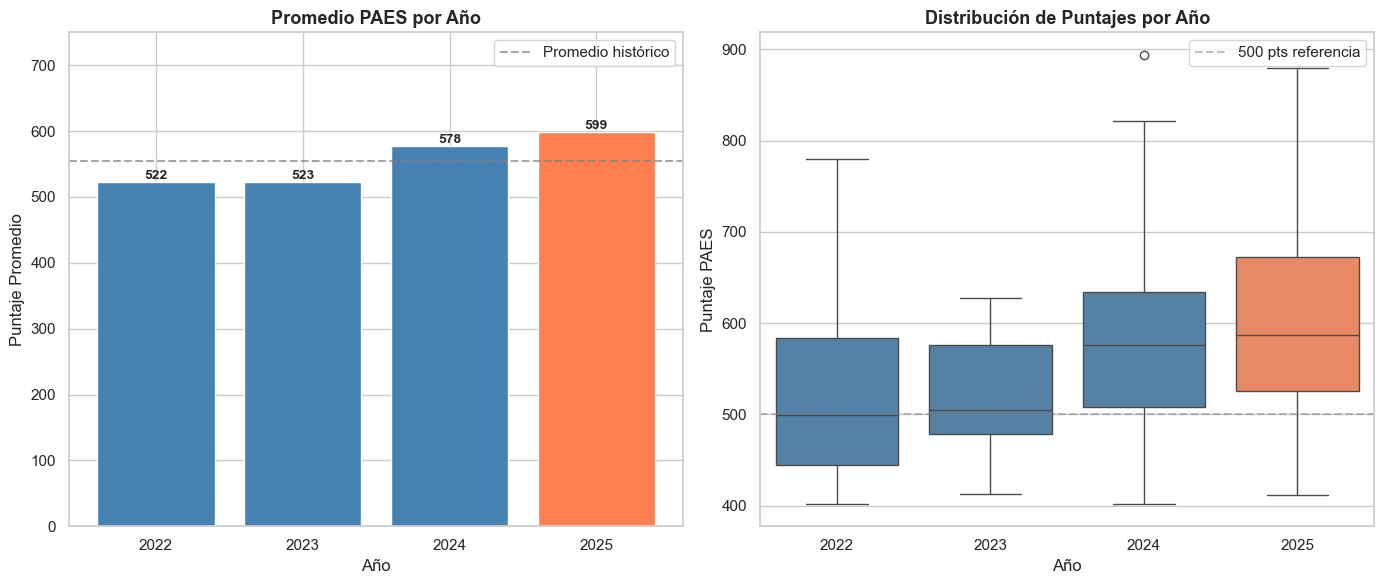


Resumen estadístico:


,Año,Promedio,Mínimo,Máximo,Desv. Estándar
0,2022,522.2,402.0,780.0,85.6
1,2023,522.9,413.0,628.0,63.8
2,2024,577.5,402.0,894.0,103.1
3,2025,598.7,412.0,880.0,115.1


In [4]:
resumen = df_oficial.groupby('AÑO')['M1'].agg(['mean','min','max','std']).round(1).reset_index()
resumen.columns = ['Año','Promedio','Mínimo','Máximo','Desv. Estándar']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Promedio por año
colores = ['steelblue' if a != 2025 else 'coral' for a in resumen['Año']]
axes[0].bar(resumen['Año'].astype(str), resumen['Promedio'], color=colores)
axes[0].axhline(resumen['Promedio'].mean(), color='gray', linestyle='--', alpha=0.7, label='Promedio histórico')
for i, row in resumen.iterrows():
    axes[0].text(i, row['Promedio'] + 5, f"{row['Promedio']:.0f}", ha='center', fontsize=10, fontweight='bold')
axes[0].set_title('Promedio PAES por Año', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Puntaje Promedio')
axes[0].set_ylim(0, 750)
axes[0].legend()

# Boxplot por año
sns.boxplot(data=df_oficial, x='AÑO', y='M1', ax=axes[1], palette=['steelblue','steelblue','steelblue','coral'])
axes[1].axhline(500, color='gray', linestyle='--', alpha=0.5, label='500 pts referencia')
axes[1].set_title('Distribución de Puntajes por Año', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Puntaje PAES')
axes[1].legend()

plt.tight_layout()
plt.show()
print('\nResumen estadístico:')
display(resumen)

## 🔍 Comparación: Ensayos Internos vs Resultado Oficial 2025

> Solo se compara 4° medio ya que son quienes rindieron la PAES oficial 2025.

📊 Promedio Ensayo 1 (4° medio): 504.6
📊 Promedio Ensayo 2 (4° medio): 501.3
📊 Promedio PAES Oficial 2025:   598.7

📈 Diferencia Ensayo1 → Oficial: +94.1 pts
📈 Diferencia Ensayo2 → Oficial: +97.4 pts


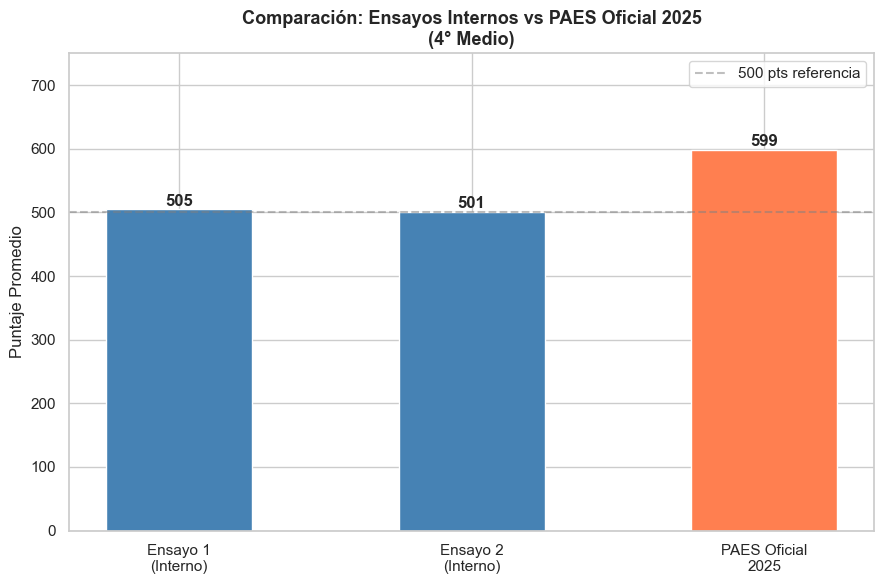

In [5]:
# Filtrar solo 4to medio de ensayos
df_4to = df_ensayos[df_ensayos['Curso'].isin(['4A','4B'])]

prom_ensayo1 = df_4to['Ensayo1'].mean().round(1)
prom_ensayo2 = df_4to['Ensayo2'].mean().round(1)
prom_oficial_2025 = df_oficial[df_oficial['AÑO'] == 2025]['M1'].mean().round(1)

print(f'📊 Promedio Ensayo 1 (4° medio): {prom_ensayo1}')
print(f'📊 Promedio Ensayo 2 (4° medio): {prom_ensayo2}')
print(f'📊 Promedio PAES Oficial 2025:   {prom_oficial_2025}')
print(f'\n📈 Diferencia Ensayo1 → Oficial: {prom_oficial_2025 - prom_ensayo1:+.1f} pts')
print(f'📈 Diferencia Ensayo2 → Oficial: {prom_oficial_2025 - prom_ensayo2:+.1f} pts')

fig, ax = plt.subplots(figsize=(9, 6))
valores = [prom_ensayo1, prom_ensayo2, prom_oficial_2025]
etiquetas = ['Ensayo 1\n(Interno)', 'Ensayo 2\n(Interno)', 'PAES Oficial\n2025']
colores = ['steelblue', 'steelblue', 'coral']
bars = ax.bar(etiquetas, valores, color=colores, width=0.5)
for bar, val in zip(bars, valores):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{val:.0f}', ha='center', fontsize=12, fontweight='bold')
ax.axhline(500, color='gray', linestyle='--', alpha=0.5, label='500 pts referencia')
ax.set_title('Comparación: Ensayos Internos vs PAES Oficial 2025\n(4° Medio)', fontsize=13, fontweight='bold')
ax.set_ylabel('Puntaje Promedio')
ax.set_ylim(0, 750)
ax.legend()
plt.tight_layout()
plt.show()

## 📉 Tendencia Histórica y Proyección

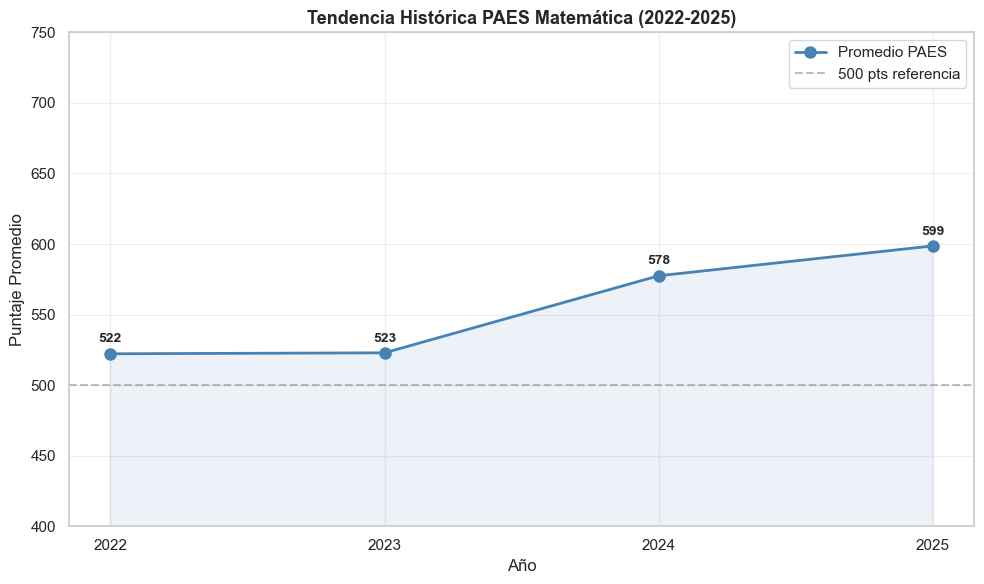

In [6]:
promedios_año = df_oficial.groupby('AÑO')['M1'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(promedios_año['AÑO'], promedios_año['M1'], marker='o', color='steelblue', linewidth=2, markersize=8, label='Promedio PAES')
for _, row in promedios_año.iterrows():
    ax.text(row['AÑO'], row['M1'] + 8, f"{row['M1']:.0f}", ha='center', fontsize=10, fontweight='bold')
ax.fill_between(promedios_año['AÑO'], promedios_año['M1'], alpha=0.1, color='steelblue')
ax.axhline(500, color='gray', linestyle='--', alpha=0.5, label='500 pts referencia')
ax.set_title('Tendencia Histórica PAES Matemática (2022-2025)', fontsize=13, fontweight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('Puntaje Promedio')
ax.set_xticks(promedios_año['AÑO'])
ax.set_ylim(400, 750)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 📝 Conclusiones

### Evolución histórica
- El promedio PAES del establecimiento muestra una **tendencia creciente** desde 2022 a 2025.
- El año 2025 registró el promedio más alto con **598.7 puntos**, superando en más de 76 puntos al promedio de 2022.

### Ensayos internos vs resultado oficial 2025
- Los ensayos internos permitieron anticipar el nivel de los estudiantes previo a la prueba oficial.
- La comparación entre ensayos y resultado oficial indica el nivel de efectividad predictiva de las evaluaciones internas.

### Impacto de las estrategias pedagógicas
- La mejora sostenida en el tiempo sugiere que las estrategias aplicadas han tenido un **impacto positivo real**.
- Los resultados de 4° medio en 2025 representan el mejor desempeño histórico del establecimiento.

> **Este análisis fue realizado con datos reales del establecimiento educacional, combinando resultados históricos oficiales y evaluaciones internas.**